In [1]:
using ScikitLearn
using PyCall, Random, Statistics
using PyPlot, Printf
using ScikitLearn.CrossValidation: train_test_split
@pyimport matplotlib.colors as mplc
@sk_import preprocessing: StandardScaler
@sk_import datasets: (make_moons, make_circles, make_classification)
@sk_import neighbors: KNeighborsClassifier
@sk_import svm: SVC
@sk_import tree: DecisionTreeClassifier
@sk_import ensemble: (RandomForestClassifier, AdaBoostClassifier)
@sk_import naive_bayes: GaussianNB
@sk_import discriminant_analysis: (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
using ScikitLearn.Utils: meshgrid

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:399
└ @ PyCall /home/kei/.julia/packages/PyCall/zqDXB/src/PyCall.jl:399


ArgumentError: ArgumentError: invalid version string: 0.22.2.post1

In [42]:
]add PyCall

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [438e738f] + PyCall v1.91.4
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


┌ Info: Precompiling VegaDatasets [0ae4a718-28b7-58ec-9efb-cded64d6d5b4]
└ @ Base loading.jl:1273


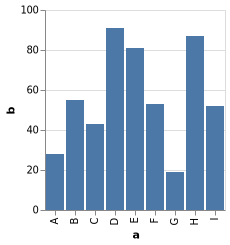

In [31]:
using VegaLite, DataFrames
using VegaDatasets
data = DataFrame(
    a=["A","B","C","D","E","F","G","H","I"],
    b=[28,55,43,91,81,53,19,87,52]
)

data |> @vlplot(:bar, x="a:o", y=:b)

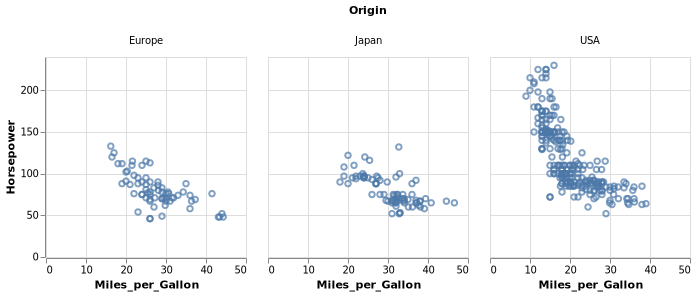

In [32]:
data = dataset("cars")

data |> @vlplot(:point, x=:Miles_per_Gallon, y=:Horsepower, column=:Origin) |> 


In [39]:
using VegaDatasets

## Deta Preparation

In [33]:
df = DataFrame(
    x = [1.1, 2],
    y = [0.2, 2],
    label = [0, 1]
)

,x,y,label
,Float64,Float64,Int64
1,1.1,0.2,0
2,2.0,2.0,1


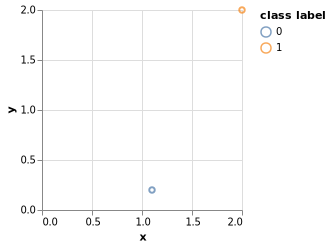

In [38]:
df |> @vlplot(
    :point, x=:x, y=:y,
    color={
    "label:n",
    legend={title="class label"}
    }
)

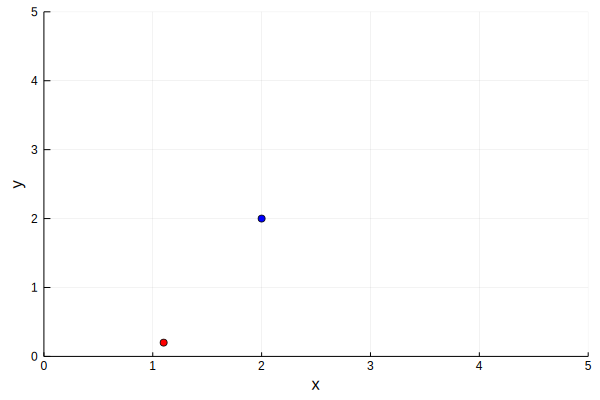

In [24]:
@df df scatter(
    :x, :y,
    xlims = (0, 5),
    ylims = (0, 5),
    xlabel = "x",
    ylabel = "y",
    color = ColorGradient([:red, :blue]),
    zcolor = :label,
    legend = :none
)

## Reference

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] failed to load from a cache file.")
└ @ Base loading.jl:1036
┌ Info: Saved animation to 
│   fn = /home/kei/Projects/LearnML.jl/DecisionTree/tmp.gif
└ @ Plots /home/kei/.julia/packages/Plots/XpHkc/src/animation.jl:98


Plots.AnimatedGif("/home/kei/Projects/LearnML.jl/DecisionTree/tmp.gif")
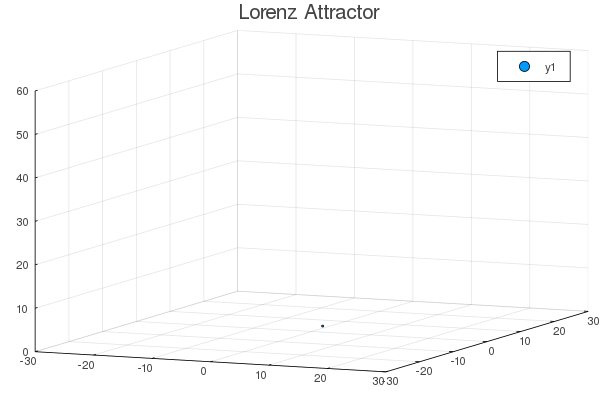

In [9]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

Classifier Comparison

https://github.com/cstjean/ScikitLearn.jl/blob/master/examples/Classifier_Comparison.ipynb